AUSTRALIA/NEW-ZEALAND POPULATION

In [7]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import warnings

Dataset Preprocesing

In [8]:
# Reading whole dataset from file and loading the data into a DataFrame
file_path = 'age_data.xls'
try:
    df_sheet_names = pd.ExcelFile(file_path).sheet_names
except FileNotFoundError:
    print(f"No file found at {file_path}")
    # Handle the error or exit
    exit()

# Function to filter a dataset for Nigeria
def filtered_dataset(dataset):
    # Check if the country code exists in the dataset
    if 566 not in dataset['Country code'].values:
        print("Country code 927 not found in dataset")
        # Handle the error or return
        return dataset
    return dataset[dataset['Country code'] == 927]\
            .drop(columns = ['Country code'])\
            .set_index('Year')

# Try to read raw data from excel and assign to variables
try:
    both_1950_2005_estimates = pd.read_excel(file_path, header = 0, sheet_name=df_sheet_names[0])
    both_2010_2050_medium_fertility = pd.read_excel(file_path, header = 0, sheet_name=df_sheet_names[1])
    male_1950_2005_estimates = pd.read_excel(file_path, header = 0, sheet_name=df_sheet_names[3])
    male_2010_2050_medium_fertility = pd.read_excel(file_path, header = 0, sheet_name=df_sheet_names[4])
    female_1950_2005_estimates = pd.read_excel(file_path, header = 0, sheet_name=df_sheet_names[6])
    female_2010_2050_medium_fertility = pd.read_excel(file_path, header = 0, sheet_name=df_sheet_names[7])
except KeyError as e:
    print(f"Sheet name {e} not found in Excel file")
    # Handle the error or exit
    exit()

# Update datasets to filter data for Nigeria
both_1950_2005_estimates = filtered_dataset(both_1950_2005_estimates)
both_2010_2050_medium_fertility = filtered_dataset(both_2010_2050_medium_fertility)
male_1950_2005_estimates = filtered_dataset(male_1950_2005_estimates)
male_2010_2050_medium_fertility = filtered_dataset(male_2010_2050_medium_fertility)
female_1950_2005_estimates = filtered_dataset(female_1950_2005_estimates)
female_2010_2050_medium_fertility = filtered_dataset(female_2010_2050_medium_fertility)

In [9]:
both_2010_2050_medium_fertility

,0 - 4,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,...,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 - 89,90 - 94,95 - 99,100+
Year,,,,,,,,,,,,,,,,,,,,,
2010,1546.980,1549.665,1613.325,1723.457,1791.215,1778.882,1700.642,1772.833,1831.398,1836.259,...,1590.048,1425.814,1062.872,809.331,626.636,496.230,301.671,119.975,32.708,5.097
2015,1610.175,1569.680,1563.453,1648.353,1800.051,1883.905,1856.407,1754.726,1805.478,1846.186,...,1739.184,1551.773,1362.429,981.503,705.669,496.480,333.745,155.862,44.002,7.815
2020,1701.028,1632.965,1583.562,1598.766,1725.631,1893.399,1961.862,1910.710,1788.219,1821.455,...,1817.297,1699.511,1486.490,1262.508,860.654,564.401,339.733,177.364,59.307,11.043
2025,1731.351,1723.863,1646.896,1619.024,1676.465,1819.575,1971.841,2016.432,1944.233,1805.053,...,1830.160,1777.981,1631.159,1382.221,1112.843,694.186,391.934,185.204,69.633,15.394
2030,1720.128,1754.246,1737.817,1682.439,1696.956,1770.833,1898.578,2026.864,2050.176,1960.951,...,1808.684,1792.964,1709.710,1521.409,1225.037,905.521,489.288,219.083,75.186,19.133
2035,1696.500,1743.099,1768.241,1773.424,1760.542,1791.599,1850.282,1954.203,2061.128,2067.085,...,1794.882,1774.141,1727.430,1599.153,1354.800,1005.365,647.610,279.994,91.641,21.796
2040,1700.796,1719.552,1757.143,1803.937,1851.670,1855.392,1871.344,1906.396,1989.194,2078.678,...,1949.766,1762.440,1712.334,1620.296,1430.256,1120.349,729.141,379.181,120.526,26.859
2045,1738.965,1723.912,1733.648,1792.942,1882.382,1946.706,1935.372,1927.792,1941.992,2007.715,...,2056.156,1915.838,1703.635,1610.363,1455.624,1191.243,823.019,436.458,167.911,35.748
2050,1789.802,1762.128,1738.046,1769.534,1871.578,1977.641,2026.860,1992.050,1963.767,1961.297,...,2069.874,2022.030,1854.349,1605.797,1452.688,1221.236,885.795,502.896,198.767,50.623


In [10]:
both_1950_2005_estimates

,0 - 4,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,...,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 - 89,90 - 94,95 - 99,100+
Year,,,,,,,,,,,,,,,,,,,,,
1950,1117.000,884.000,733.000,691.000,785.000,824.000,750.000,762.000,682.000,600.000,...,491.000,435.000,342.000,234.000,148.000,114.997,-,-,-,-
1955,1237.808,1172.995,921.852,762.390,731.474,858.000,879.907,786.250,787.246,688.606,...,507.224,452.407,385.657,271.089,173.423,132.551,-,-,-,-
1960,1380.908,1275.172,1217.325,954.109,822.486,800.546,905.199,909.169,803.524,790.558,...,563.274,473.543,400.757,320.018,198.417,155.548,-,-,-,-
1965,1487.193,1443.794,1342.967,1274.362,1018.971,895.770,848.394,939.316,941.389,807.970,...,652.392,527.156,432.246,330.276,236.341,192.858,-,-,-,-
1970,1505.231,1558.180,1502.895,1389.109,1326.623,1083.302,952.340,884.998,956.904,938.726,...,749.267,609.224,469.411,360.812,248.314,223.170,-,-,-,-
1975,1556.879,1543.425,1582.910,1522.975,1402.680,1371.577,1121.236,972.005,900.812,943.755,...,750.849,683.976,540.537,397.536,262.235,250.057,-,-,-,-
1980,1380.649,1550.549,1602.641,1585.616,1538.529,1441.883,1394.666,1146.714,981.034,892.583,...,863.525,731.595,631.204,473.437,308.871,300.193,-,-,-,-
1985,1474.813,1421.480,1591.883,1640.291,1615.777,1580.782,1490.374,1419.158,1161.738,981.275,...,904.370,822.846,671.923,547.978,376.487,331.634,-,-,-,-
1990,1515.220,1498.707,1478.682,1680.150,1622.807,1676.858,1656.937,1545.983,1489.248,1159.943,...,856.222,869.023,784.544,580.497,451.261,444.904,-,-,-,-


TASK 1

Determine the «survival» rates independently for men and women for all age groups (“0-4” -> “5-9” -> “10-14” ...) according to 2000-2005 years (data for Russia or any other country)


In [11]:
def get_survival_rate(dataset, start_year, end_year):
    """
    Calculates the survival rate for each age group over a specified period.

    The survival rate is calculated as the ratio of the population at the end of the period to 
    the population at the start of the period for each age group, with the start_year population 
    shifted one age group. 

    Note: The '0 - 4' age group is dropped because this group does not have a preceding age 
    group from which to calculate a survival rate.

    Args:
    dataset (pd.DataFrame): The dataset to calculate survival rates from.
    start_year (int): The start year of the period.
    end_year (int): The end year of the period.

    Returns:
    pd.DataFrame: A DataFrame with survival rates for each age group.
    """
    return pd.DataFrame(dataset.loc[end_year] / dataset.loc[start_year].shift(periods = 1), columns = [end_year]).drop('0 - 4').T


In [12]:
get_survival_rate(male_1950_2005_estimates, 2000, 2005)

,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,50 - 54,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 - 89,90 - 94,95 - 99,100+
2005,1.016097,1.010998,1.023469,1.047875,1.059838,1.04832,1.032224,1.018708,1.008314,0.998256,0.984983,0.966617,0.93744,0.891362,0.820329,0.718454,0.578153,0.412859,0.286443,0.206897


In [13]:
def plot_survival_rates(dataset, years, gender='men'):

    # Set up the seaborn style
    sns.set_style("whitegrid")
    sns.set_palette("husl")

    # Create a new figure with specified size
    plt.figure(figsize=(20,7))

    # For each start year in the given list...
    for year in years:
        # ...calculate the survival rate for the 5-year period starting from that year
        survival_rate = get_survival_rate(dataset, year, year + 5)

        # Plot the survival rate as a line on the figure
        plt.plot(survival_rate.T, label=f'{year}-{year+5}', linestyle='-', marker='o', markersize=8)

    # Set the title of the figure (includes the gender)
    plt.title(f'Survival rate for {gender}')
    
    # Set the label for the x-axis
    plt.xlabel('Age group')

    # Set the label for the y-axis
    plt.ylabel('Survival rate')

    # Display the legend (shows which line corresponds to which year)
    plt.legend()

    # Show the figure
    plt.show()


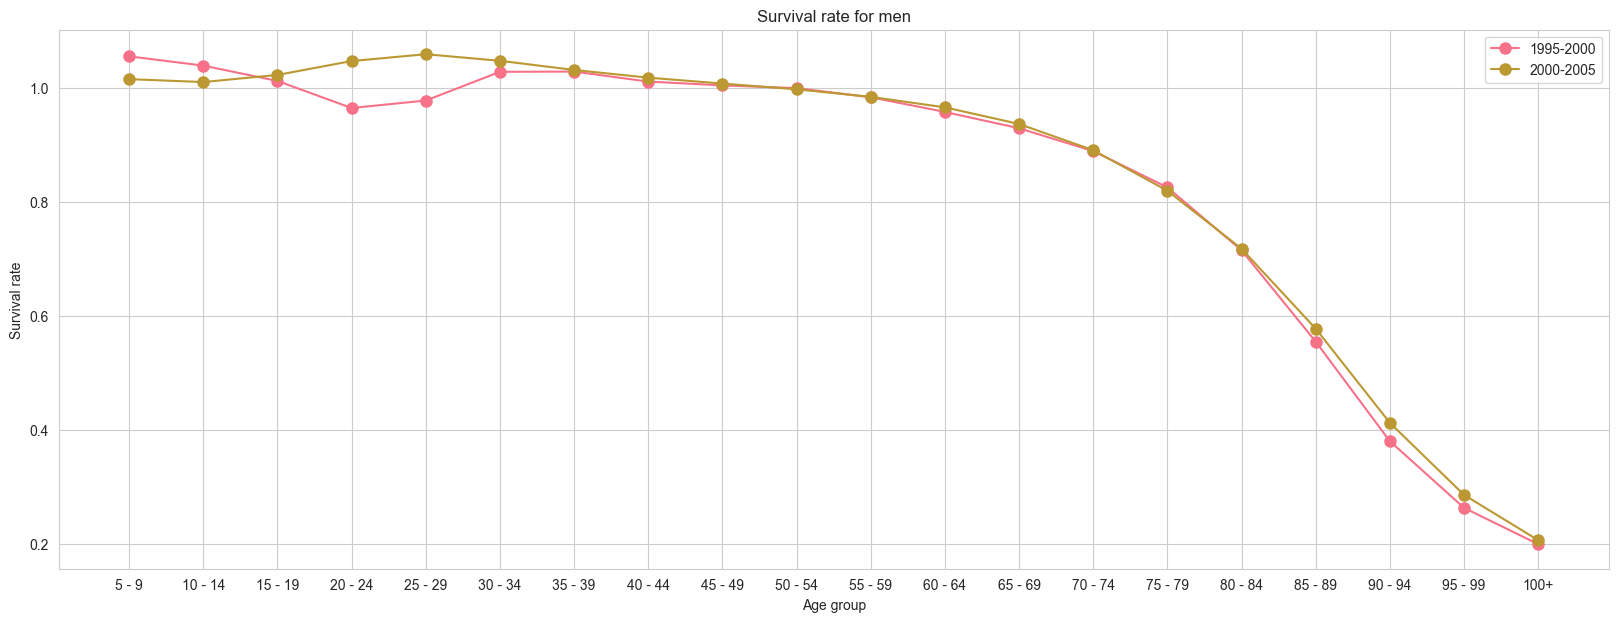

In [14]:
# Select the last two unique years from the index of the male dataset
# This will be a list like [2000, 2005] if those are the last two unique years
years_to_plot = male_1950_2005_estimates.index[-3:-1]

# Call the new function with the male dataset and the selected years
plot_survival_rates(male_1950_2005_estimates, years_to_plot, 'men')

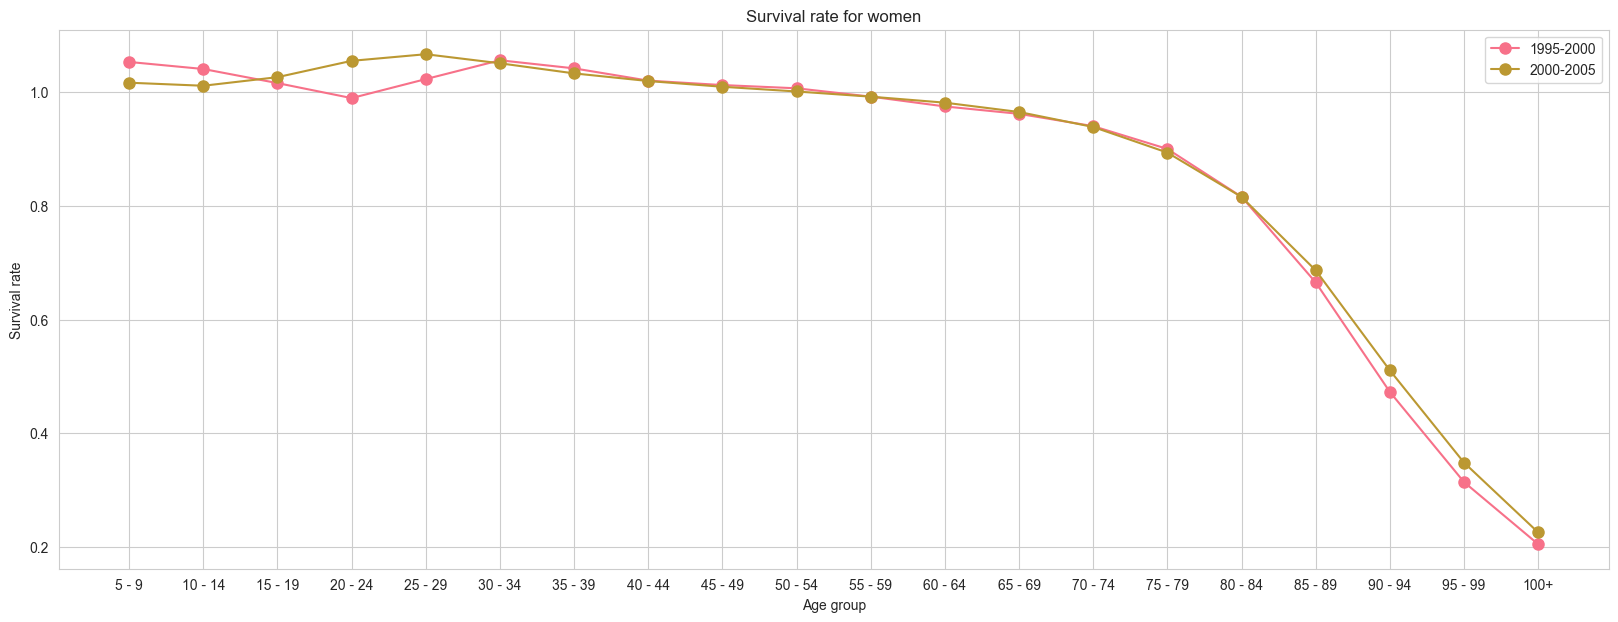

In [15]:
# Select the last two unique years from the index of the male dataset
# This will be a list like [2000, 2005] if those are the last two unique years
years_to_plot = female_1950_2005_estimates.index[-3:-1]

# Call the new function with the male dataset and the selected years
plot_survival_rates(female_1950_2005_estimates, years_to_plot, 'women')

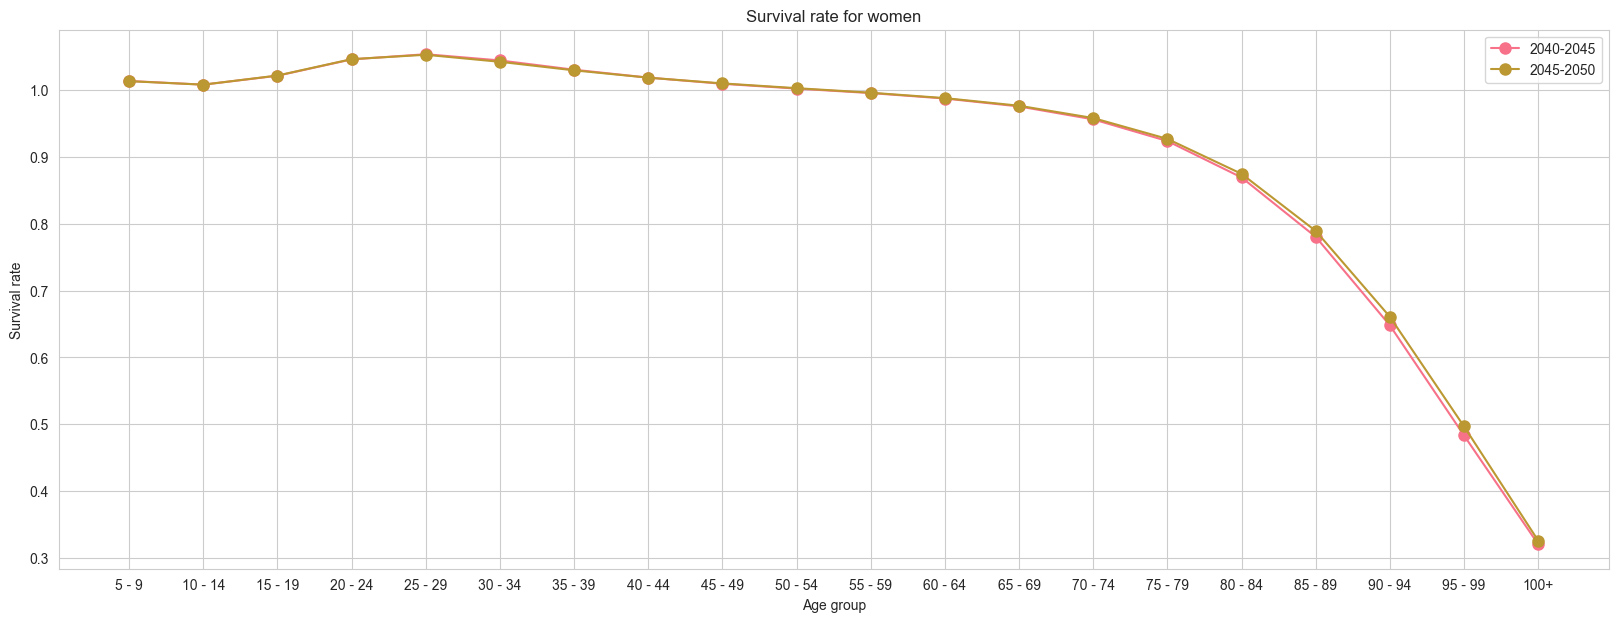

In [16]:
# Select the last two unique years from the index of the male dataset
# This will be a list like [2000, 2005] if those are the last two unique years
years_to_plot = female_2010_2050_medium_fertility.index[-3:-1]

# Call the new function with the male dataset and the selected years
plot_survival_rates(female_2010_2050_medium_fertility, years_to_plot, 'women')

Task 2

Determine the fertility rate for women in the age category “'20 - 24', '25 - 29', '30 - 34', '35 - 39'”

In [17]:
def get_fertility_rate(dataset_children, dataset_women, year, child_age_group, women_age_groups):
    """
    Calculate the fertility rate for a given year.

    Parameters:
    - dataset_children: DataFrame containing population data for children.
    - dataset_women: DataFrame containing population data for women.
    - year: The year to calculate the fertility rate for.
    - child_age_group: The age group to consider for children (usually '0 - 4').
    - women_age_groups: List of age groups to consider for women.
    
    Returns:
    The fertility rate for the given year, defined as the ratio of the number of children
    to the number of women in the given age groups.
    """
    
    children_population = dataset_children.loc[year, child_age_group]
    women_population = dataset_women.loc[year, women_age_groups].sum()
    
    return children_population / women_population


In [18]:
# Usage:
child_age_group = '0 - 4'
women_age_groups = ['15 - 19','20 - 24', '25 - 29', '30 - 34', '35 - 39']

get_fertility_rate(both_1950_2005_estimates, female_1950_2005_estimates, 2005, child_age_group, women_age_groups)

0.3572446699182366

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_fertility_rates(dataset_children, dataset_women, start_year, end_year, child_age_group, women_age_groups):
    """
    Plot the fertility rate over a range of years.

    Parameters:
    - dataset_children: DataFrame containing population data for children.
    - dataset_women: DataFrame containing population data for women.
    - start_year, end_year: The range of years to plot fertility rates for.
    - child_age_group: The age group to consider for children (usually '0 - 4').
    - women_age_groups: List of age groups to consider for women.
    """
    
    # Set up the seaborn style
    sns.set_style("whitegrid")
    sns.set_palette("husl")

    # Create a new figure with specified size
    plt.figure(figsize=(20,7))

    years = list(range(start_year, end_year + 1, 5))
    fertility_rates = []

    for year in years:
        fertility_rate = get_fertility_rate(dataset_children, dataset_women, year, child_age_group, women_age_groups)
        fertility_rates.append(fertility_rate)
    
    # Plot the fertility rates as a line on the figure
    plt.plot(years, fertility_rates, linestyle='-', marker='o', markersize=8)

    # Set the title of the figure
    plt.title(f'Fertility rate from {start_year} to {end_year}')
    
    # Set the label for the x-axis
    plt.xlabel('Year')

    # Set the label for the y-axis
    plt.ylabel('Fertility rate')

    # Show the figure
    plt.show()


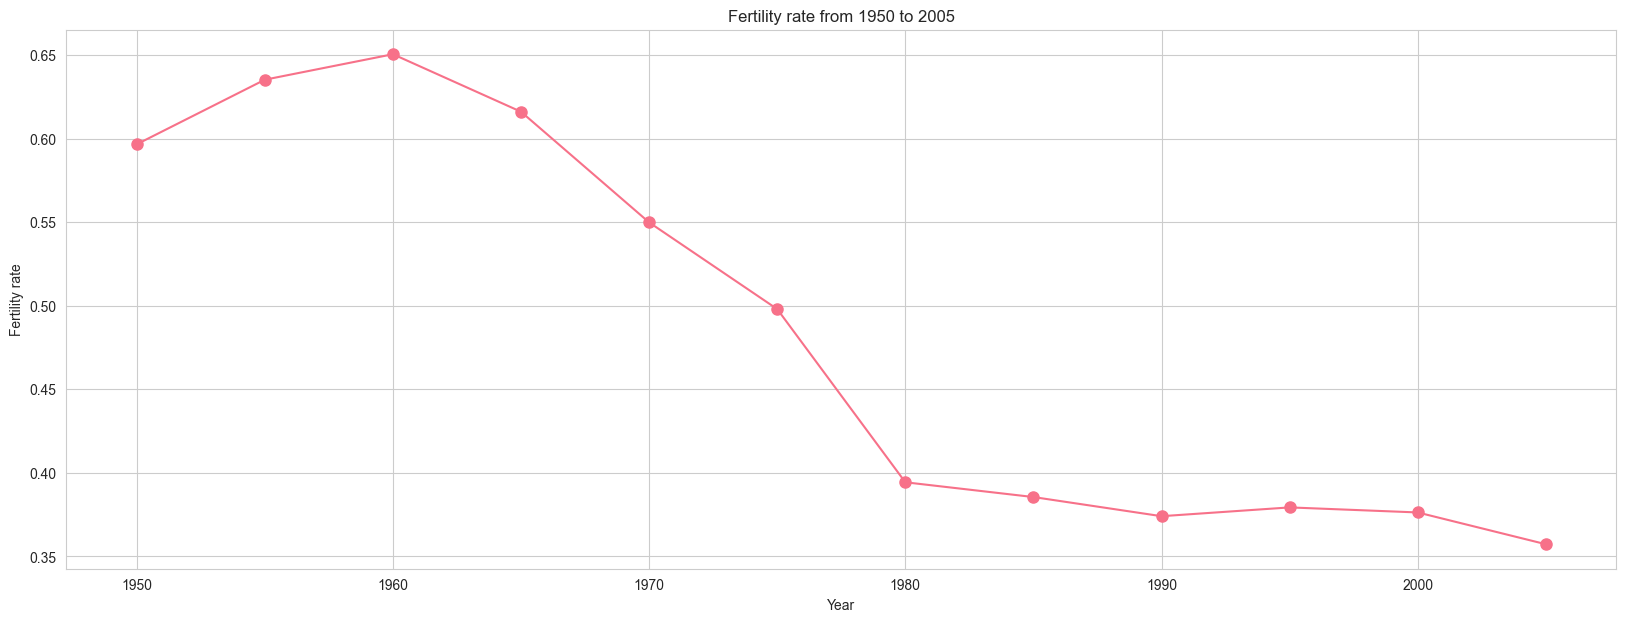

In [20]:
plot_fertility_rates(both_1950_2005_estimates, female_1950_2005_estimates, 1950, 2005, child_age_group, women_age_groups)


Task 3

Calculate boys/girls ratio for newborn children

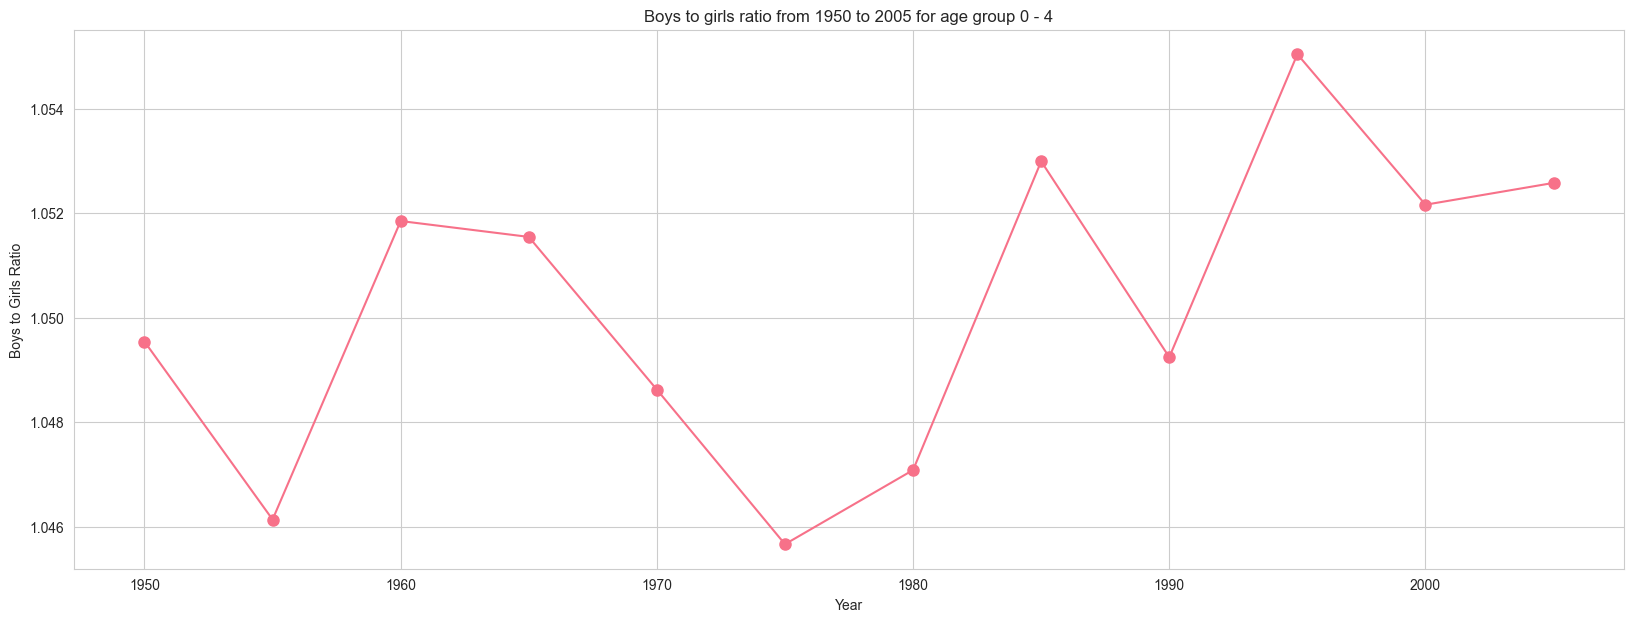

In [21]:
def plot_gender_ratio(dataset_men, dataset_women, start_year, end_year, age_group):
    """
    Plot the boys to girls ratio over a range of years.

    Parameters:
    - dataset_men: DataFrame containing population data for boys/men.
    - dataset_women: DataFrame containing population data for girls/women.
    - start_year, end_year: The range of years to plot gender ratios for.
    - age_group: The age group to consider (e.g., '0 - 4').
    """
    
    # Set up the seaborn style
    sns.set_style("whitegrid")
    sns.set_palette("husl")

    # Create a new figure with specified size
    plt.figure(figsize=(20,7))

    years = list(range(start_year, end_year + 1, 5))  # Adjust this line to account for 5-year intervals
    gender_ratios = []

    for year in years:
        boys = dataset_men.loc[year, age_group]
        girls = dataset_women.loc[year, age_group]
        ratio = boys / girls
        gender_ratios.append(ratio)

    # Plot the gender ratios as a line on the figure
    plt.plot(years, gender_ratios, linestyle='-', marker='o', markersize=8)

    # Set the title of the figure
    plt.title(f'Boys to girls ratio from {start_year} to {end_year} for age group {age_group}')

    # Set the label for the x-axis
    plt.xlabel('Year')

    # Set the label for the y-axis
    plt.ylabel('Boys to Girls Ratio')

    # Show the figure
    plt.show()

# Call the function with appropriate arguments:
plot_gender_ratio(male_1950_2005_estimates, female_1950_2005_estimates, 1950, 2005, '0 - 4')


Task 4

Predict the change in the country's population and demographic profile for 100 years and compare with existing prediction!


In [22]:
category = both_1950_2005_estimates.columns

def get_boy_prob(year):
    return male_1950_2005_estimates.loc[year, category[0]] / both_1950_2005_estimates.loc[year, category[0]]

def get_girl_prob(year):
    return female_1950_2005_estimates.loc[year, category[0]] / both_1950_2005_estimates.loc[year, category[0]]

In [23]:
# Model's parameter

# Define the age groups
age_groups = ['0 - 4', '5 - 9', '10 - 14', '15 - 19', '20 - 24', '25 - 29', '30 - 34', '35 - 39', '40 - 44', '45 - 49', 
              '50 - 54', '55 - 59', '60 - 64', '65 - 69', '70 - 74', '75 - 79', '80 - 84', '85 - 89', '90 - 94', '95 - 99', '100+']

start_year = 2000  
end_year = 2005
survival_rate = get_survival_rate(both_1950_2005_estimates, start_year, end_year).loc[2005]
fertility = get_fertility_rate(both_1950_2005_estimates, female_1950_2005_estimates, 2005, child_age_group, women_age_groups)

girl_probability = get_girl_prob(2005)
boy_probability = get_boy_prob(2005)

years = []
for i in range(20):
    years.append(2005 + i * 5)
years

female_estimates = female_1950_2005_estimates.copy()
male_estimates = male_1950_2005_estimates.copy()
both_estimates = both_1950_2005_estimates.copy()

# Initialize the projections with 2005 data
population_projections = pd.DataFrame(index=range(2005, 2065, 5), columns=age_groups)
population_projections.loc[2005] = both_estimates.loc[2005]
    
for i in range(len(years) -1):
    f_0 = female_estimates.loc[years[i+1],category[0]] = fertility * female_estimates.loc[years[i], ['15 - 19','20 - 24', '25 - 29', '30 - 34', '35 - 39']].sum() * girl_probability
    f_1 = female_estimates.loc[years[i+1],category[1:]] = survival_rate * female_estimates.loc[years[i]].shift(periods = 1)
    m_0 = male_estimates.loc[years[i+1],category[0]] = fertility * male_estimates.loc[years[i], ['15 - 19','20 - 24', '25 - 29', '30 - 34', '35 - 39']].sum() * boy_probability
    m_1 = male_estimates.loc[years[i+1],category[1:]] = survival_rate * male_estimates.loc[years[i]].shift(periods = 1)
    
    population_projections.loc[years[i+1],category[0]] = f_0 + m_0
    population_projections.loc[years[i+1],category[1:]] = f_1 + m_1


In [24]:
def plot_comparison(year):
    plt.figure(figsize = (20,7))
    plt.plot(population_projections.loc[year], label = 'Predict by me')
    plt.plot(both_2010_2050_medium_fertility.loc[year], label = 'Predict by UN')
    plt.legend()
    plt.title('Comparison my and UN forecast')
    plt.show();

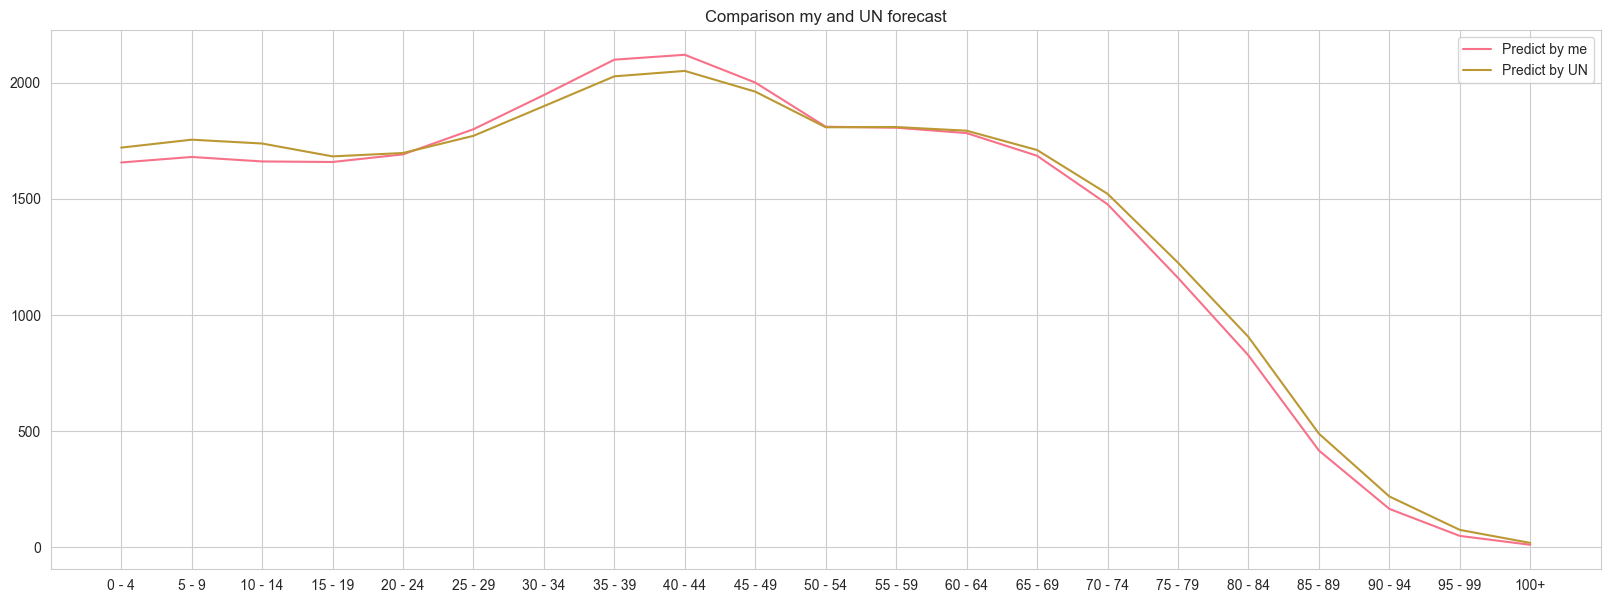

In [25]:
plot_comparison(2030)

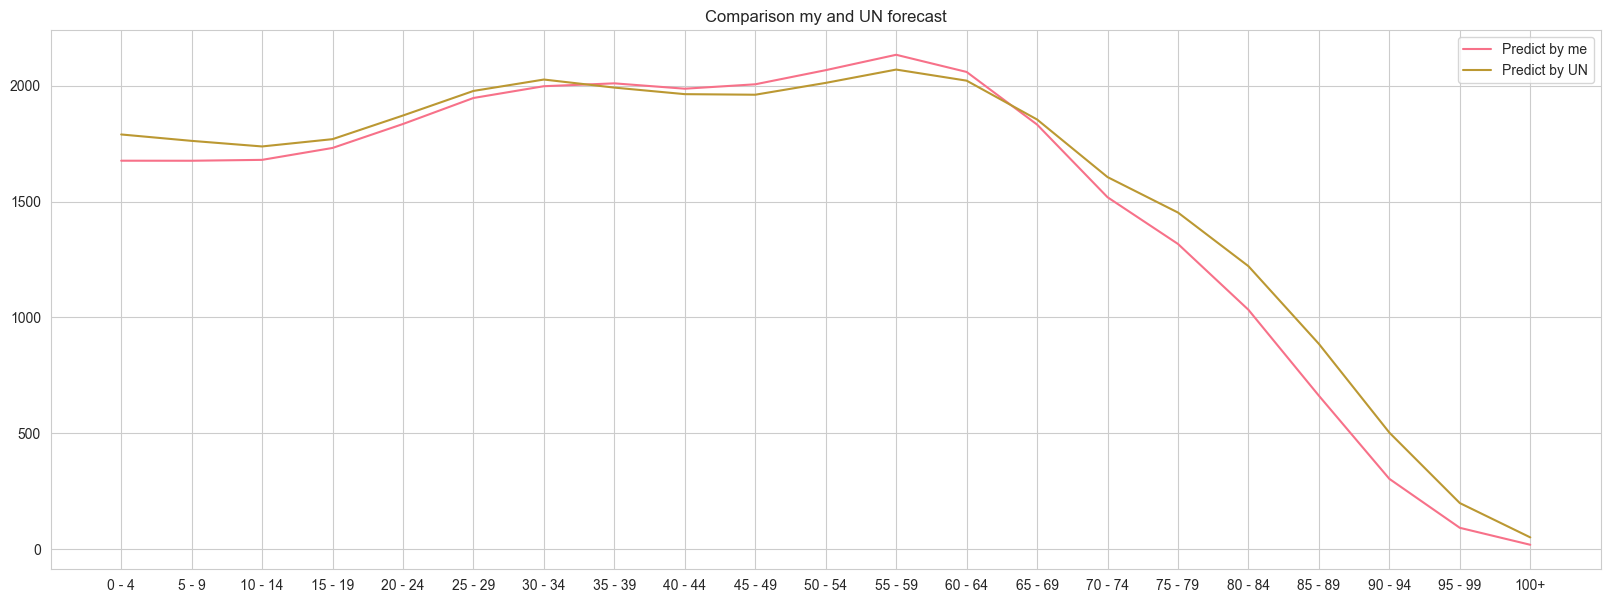

In [26]:
plot_comparison(2050)